In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [157]:
file1 = pd.read_csv('kc_house_data.csv')
house_df=file1
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [158]:
house_df['date']=house_df['date'].str.extract('(^\d*)')
house_df['date'] = pd.to_datetime(house_df['date'], format='%Y%m%d')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


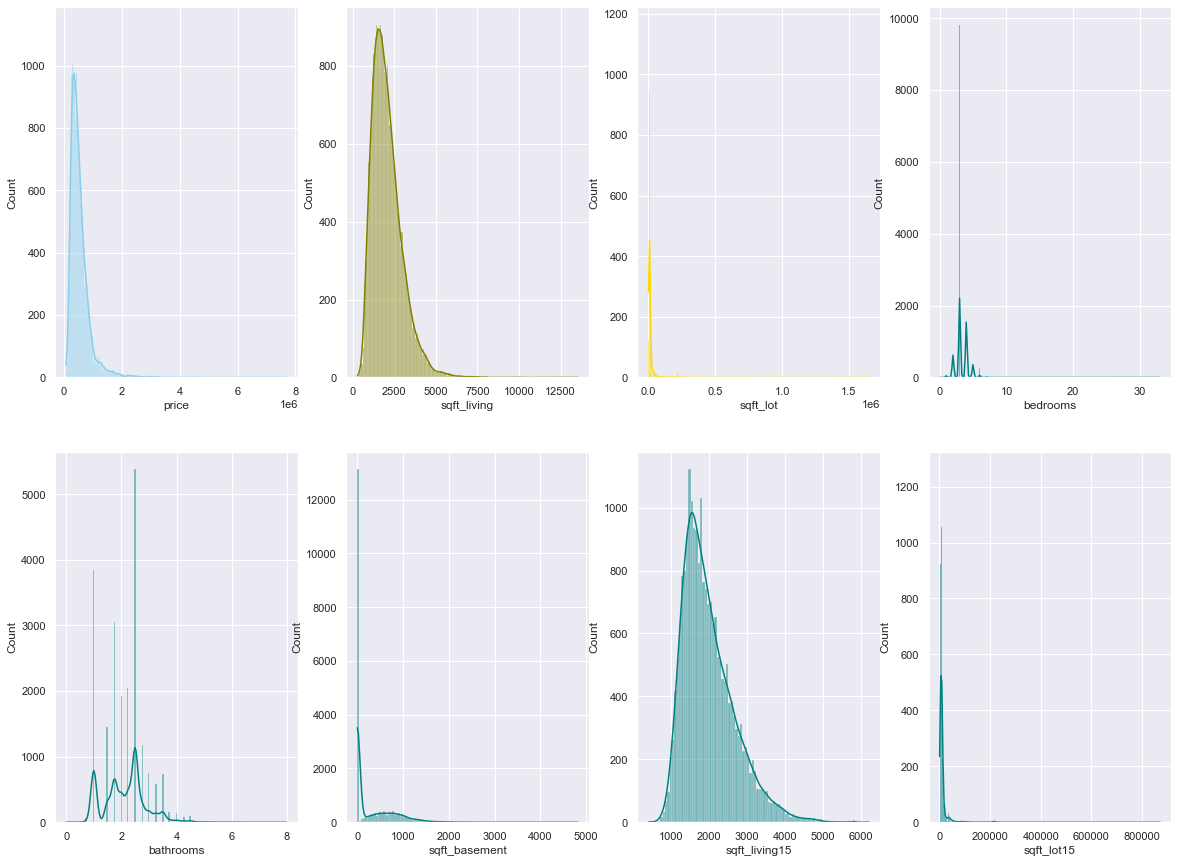

In [159]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 4, figsize=(20, 15))

sns.histplot(data=house_df, x="price", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=house_df, x="sqft_living", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=house_df, x="sqft_lot", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=house_df, x="bedrooms", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=house_df,x="bathrooms", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=house_df, x="sqft_basement", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=house_df, x="sqft_living15", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=house_df, x="sqft_lot15", kde=True, color="teal", ax=axs[1, 3])

plt.show()

In [160]:
def outliers(df, ft):
    Q1 = house_df[ft].quantile(0.25)
    Q3 = house_df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft]> upper_bound)]
    
    return ls

In [161]:
index_list = []
for x in ['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot','floors', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']:
    index_list.extend(outliers(house_df, x))

In [162]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [163]:
house_df = remove(house_df, index_list)


In [164]:
house_df=house_df.reset_index()


In [165]:
house_numerical = house_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built',
 'yr_renovated','sqft_living15','sqft_lot15']]
house_numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,360000.0,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509
17182,400000.0,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200
17183,402101.0,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007
17184,400000.0,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287


<AxesSubplot:>

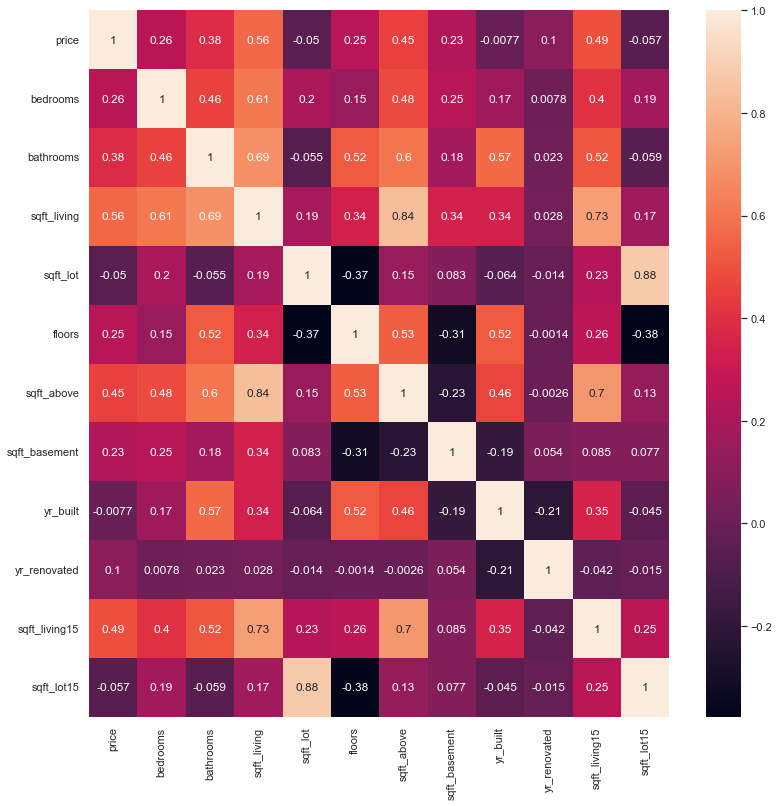

In [166]:
fig=plt.figure(figsize=(13,13))
sns.heatmap(house_numerical.corr(),annot=True)

In [167]:
def clean_sqft_basement(x):
    if x ==0:
        return 0
    else:
        return 1

In [168]:
house_df['sqft_basement'] = list(map(clean_sqft_basement, house_df['sqft_basement'])) 
r=house_df
r

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17182,21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
17183,21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
17184,21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [169]:
h_df = r.drop(['index','id','date','price'], axis=1)
h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17182,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
17183,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
17184,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [170]:
j = r.drop(['index','id','date','price'], axis=1)
j

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17182,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
17183,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
17184,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [171]:
house_numerical_new = house_df[['price','bedrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built',
 'yr_renovated','sqft_living15','sqft_lot15']]
house_numerical_new

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2570,7242,2.0,2170,1,1951,1991,1690,7639
2,180000.0,2,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,1960,5000,1.0,1050,1,1965,0,1360,5000
4,510000.0,3,1680,8080,1.0,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
17181,360000.0,3,1530,1131,3.0,1530,0,2009,0,1530,1509
17182,400000.0,4,2310,5813,2.0,2310,0,2014,0,1830,7200
17183,402101.0,2,1020,1350,2.0,1020,0,2009,0,1020,2007
17184,400000.0,3,1600,2388,2.0,1600,0,2004,0,1410,1287


In [172]:
#Drop correlated values
new_df=r.drop(['sqft_lot','sqft_above','long','price'], axis=1)
new_df

,index,id,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,1340,5650
1,1,6414100192,2014-12-09,3,2.25,2570,2.0,0,0,3,7,1,1951,1991,98125,47.7210,1690,7639
2,2,5631500400,2015-02-25,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,2720,8062
3,3,2487200875,2014-12-09,4,3.00,1960,1.0,0,0,5,7,1,1965,0,98136,47.5208,1360,5000
4,4,1954400510,2015-02-18,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,21608,263000018,2014-05-21,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,1530,1509
17182,21609,6600060120,2015-02-23,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,1830,7200
17183,21610,1523300141,2014-06-23,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,1020,2007
17184,21611,291310100,2015-01-16,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,1410,1287


In [173]:
new_df['floors'].value_counts()

1.0    8884
2.0    6117
1.5    1543
3.0     553
2.5      83
3.5       6
Name: floors, dtype: int64

In [174]:
new_df['floors'].round(0)
new_df

,index,id,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,1340,5650
1,1,6414100192,2014-12-09,3,2.25,2570,2.0,0,0,3,7,1,1951,1991,98125,47.7210,1690,7639
2,2,5631500400,2015-02-25,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,2720,8062
3,3,2487200875,2014-12-09,4,3.00,1960,1.0,0,0,5,7,1,1965,0,98136,47.5208,1360,5000
4,4,1954400510,2015-02-18,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,21608,263000018,2014-05-21,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,1530,1509
17182,21609,6600060120,2015-02-23,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,1830,7200
17183,21610,1523300141,2014-06-23,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,1020,2007
17184,21611,291310100,2015-01-16,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,1410,1287


In [175]:
#new_df['floors'] = list(map(floors, new_df['floors'])) 
#new_df
df_rounded = new_df.round(decimals = {'floors': 0})
df_rounded

,index,id,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,1340,5650
1,1,6414100192,2014-12-09,3,2.25,2570,2.0,0,0,3,7,1,1951,1991,98125,47.7210,1690,7639
2,2,5631500400,2015-02-25,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,2720,8062
3,3,2487200875,2014-12-09,4,3.00,1960,1.0,0,0,5,7,1,1965,0,98136,47.5208,1360,5000
4,4,1954400510,2015-02-18,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,21608,263000018,2014-05-21,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,1530,1509
17182,21609,6600060120,2015-02-23,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,1830,7200
17183,21610,1523300141,2014-06-23,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,1020,2007
17184,21611,291310100,2015-01-16,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,1410,1287


In [176]:
df_rounded['floors'].value_counts()

1.0    8884
2.0    7743
3.0     553
4.0       6
Name: floors, dtype: int64

In [177]:
h_df=house_df.drop(columns=["index",'id'],axis=1)
h_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17182,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
17183,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
17184,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [178]:
def clean_yr_renovated(x):
    if x ==0:
        return 0
    else:
        return 1

In [179]:
h_df['yr_renovated'] = list(map(clean_yr_renovated, house_df['yr_renovated'])) 
g=h_df
g.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [180]:
house_df['year']=pd.DatetimeIndex(house_df['date']).year
g['year'] = house_df['year'] 
g['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
17181    2014
17182    2015
17183    2014
17184    2015
17185    2014
Name: year, Length: 17186, dtype: int64

In [181]:
house_df['condition'].value_counts()

3    11221
4     4478
5     1354
2      116
1       17
Name: condition, dtype: int64

In [182]:
def clean_condition(x):
    if x >3:
        return 0
    elif x ==1:
        return 1
    elif x ==2:
        return 2
    else:
        return 3

In [183]:
g['condition'] = list(map(clean_condition, g['condition'])) 
h=g
h

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,1,1951,1,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
17182,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
17183,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
17184,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [184]:
#Drop 
new=h.drop(['date','yr_renovated','lat','price'], axis=1)
new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,long,sqft_living15,sqft_lot15,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,-122.257,1340,5650,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,98125,-122.319,1690,7639,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,-122.233,2720,8062,2015
3,4,3.00,1960,5000,1.0,0,0,0,7,1050,1,1965,98136,-122.393,1360,5000,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,-122.346,1530,1509,2014
17182,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,-122.362,1830,7200,2015
17183,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,-122.299,1020,2007,2014
17184,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,-122.069,1410,1287,2015


In [185]:
b=pd.get_dummies(new,columns=["zipcode"])
b

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,0,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0
17182,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,1,0,0,0,0,0,0,0,0,0
17183,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,0
17184,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,0,0,0,0,0,0,0


In [186]:
#Linear Regression
# X-y split (y is the target variable, which is the total claim amount)
X=b
y=house_df.price

In [187]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,0,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0
17182,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,1,0,0,0,0,0,0,0,0,0
17183,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,0
17184,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,0,0,0,0,0,0,0


In [188]:
#Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [189]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [190]:
X_test_scaled=std_scaler.transform(X_test)

In [191]:
#Apply linear regression.
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     708.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:09:25   Log-Likelihood:            -1.5281e+05
No. Observations:               12030   AIC:                         3.058e+05
Df Residuals:                   11944   BIC:                         3.064e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05    727.555    627.733      0.0

In [261]:
columns_drop = [4, 10, 13, 15, 31, 51, 56, 82]
columns_drop = [i-1 for i in columns_drop]

In [262]:
c = b.drop(b.columns[columns_drop], axis=1)

In [263]:
c.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'sqft_living15',
       'year', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipco

In [264]:
#Linear Regression
# X-y split (y is the target variable, which is the total claim amount)
X=c
y=house_df.price

In [265]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,...,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,1.0,0,0,3,7,0,1955,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,2.0,0,0,3,7,1,1951,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,1.0,0,0,3,6,0,1933,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,1.0,0,0,0,7,1,1965,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,1.0,0,0,3,8,0,1987,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,3,2.50,1530,3.0,0,0,3,8,0,2009,...,0,0,0,0,0,0,0,0,0,0
17182,4,2.50,2310,2.0,0,0,3,8,0,2014,...,0,1,0,0,0,0,0,0,0,0
17183,2,0.75,1020,2.0,0,0,3,7,0,2009,...,1,0,0,0,0,0,0,0,0,0
17184,3,2.50,1600,2.0,0,0,3,8,0,2004,...,0,0,0,0,0,0,0,0,0,0


In [266]:
#Train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [267]:
#Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [268]:
X_test_scaled=std_scaler.transform(X_test)

In [269]:
#Apply linear regression.
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     758.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:23:19   Log-Likelihood:            -1.5290e+05
No. Observations:               12030   AIC:                         3.060e+05
Df Residuals:                   11951   BIC:                         3.066e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+05    732.908    623.149      0.0

In [270]:
predictions_test

array([495773.84737423, 263538.19351083, 818228.10274605, ...,
       504713.15693839, 252890.64931287, 694983.10009764])

In [271]:
#display adjusted R-squared
print(model.rsquared_adj)

0.8307604726469294


Modeling using Scikit Learn

In [272]:
#Model Interpretation.
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [273]:
model.coef_

array([ -3129.34107446,   9873.74853368,  71390.63676545,  -5035.91818319,
         8336.35485294,  18897.29424356, -10920.16685804,  41607.82785956,
        -9324.86752202, -20303.41032673,  18226.07530383,  10554.91367346,
       -19881.73668899, -14564.93064379, -19750.77437386,  30123.9579906 ,
        12374.57218743,  14520.87139472,   7256.91910607,   8622.31226928,
        -3445.04347824,  -1613.75277259,  -2436.08797619,  -5116.53250879,
       -13507.70831747, -28526.06564127,   8619.3263698 ,  -3891.5641014 ,
         9159.97158837, -18180.72706978, -17541.92538771, -12525.26937471,
        21985.82777528,   4464.36299747, -20252.53551099,   9694.46497184,
        22037.00137938, -23652.7400837 ,  -4254.14852689,  16386.34868863,
        10854.90141243, -14861.80556402,  -8124.00523834, -18118.52347072,
        -8928.18426207,  -3776.74715969,   -413.86086068,   7076.2134541 ,
         7542.41322291, -21897.82281671,  16136.45796364,  27922.90574814,
        20293.77496135,  

In [274]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

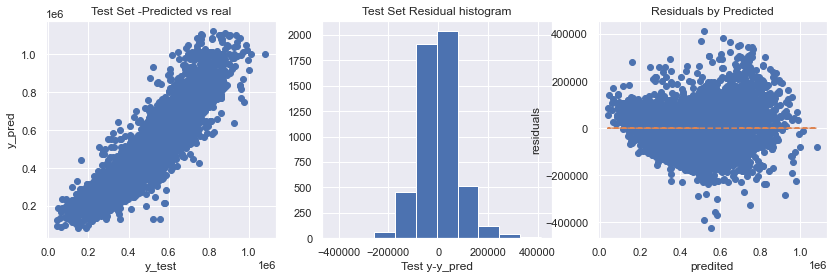

In [275]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [276]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

Model validation

In [277]:
# Model Evaluation: 
# MSE
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

6386672723.530197
58845.272965215336


In [278]:
import math 
# RMSE
##prediction on the train set
#mse(y_train,y_pred_train)
print(math.sqrt(mse(y_test,y_pred)))

79916.66111350122


In [279]:
R2=r2_score(y_test,y_pred)
R2

0.83438185693996

In [280]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [281]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8318373985671644

In [282]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

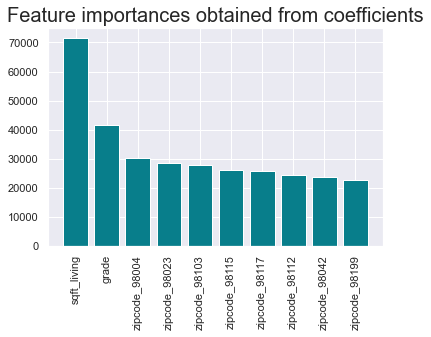

In [283]:
plt.bar(x=features_importances['Attribute'][0:10], height=features_importances['Importance'][0:10], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [284]:
file2 = pd.read_csv('usa_zipcode_of_wa-1564j.csv')
zip_code =file2
zip_code

,zip,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE
...,...,...,...,...,...
691,98597,"YELM, WA",YELM,WA,THURSTON
692,98953,"ZILLAH, WA",ZILLAH,WA,YAKIMA
693,NaN,NaN,NaN,NaN,NaN
694,NaN,NaN,NaN,NaN,NaN


In [285]:
zipe_code = zip_code.rename(columns={'zip': 'zipcode'})
zipe_code

,zipcode,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE
...,...,...,...,...,...
691,98597,"YELM, WA",YELM,WA,THURSTON
692,98953,"ZILLAH, WA",ZILLAH,WA,YAKIMA
693,NaN,NaN,NaN,NaN,NaN
694,NaN,NaN,NaN,NaN,NaN


In [286]:
zipe_code_clean = zipe_code.dropna()
zipe_code_clean

,zipcode,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE
...,...,...,...,...,...
688,98907,"YAKIMA, WA",YAKIMA,WA,YAKIMA
689,98908,"YAKIMA, WA",YAKIMA,WA,YAKIMA
690,98909,"YAKIMA, WA",YAKIMA,WA,YAKIMA
691,98597,"YELM, WA",YELM,WA,THURSTON


In [287]:
zipe_code_clean['zipcode']=zipe_code_clean['zipcode'].astype(str).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_44024\1243213416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipe_code_clean['zipcode']=zipe_code_clean['zipcode'].astype(str).astype(int)


In [288]:
merge_df = pd.merge(h,zipe_code_clean, on='zipcode')
merge_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,Zipcode name,City,State,County Name
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014,"SEATTLE, WA",SEATTLE,WA,KING
1,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,0,...,98178,47.5009,-122.248,1190,6780,2014,"SEATTLE, WA",SEATTLE,WA,KING
2,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,3,...,98178,47.5091,-122.244,2660,8712,2014,"SEATTLE, WA",SEATTLE,WA,KING
3,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,3,...,98178,47.5053,-122.255,1320,7619,2014,"SEATTLE, WA",SEATTLE,WA,KING
4,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,3,...,98178,47.5048,-122.272,1650,8775,2015,"SEATTLE, WA",SEATTLE,WA,KING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,2015-02-10,940000.0,3,1.00,1220,8119,1.0,0,0,0,...,98039,47.6328,-122.236,1910,8119,2015,"MEDINA, WA",MEDINA,WA,KING
17182,2015-03-24,937500.0,3,1.00,1320,8500,1.0,0,0,0,...,98039,47.6187,-122.226,2790,10800,2015,"MEDINA, WA",MEDINA,WA,KING
17183,2014-11-18,865000.0,3,1.50,1530,10827,1.0,0,0,0,...,98039,47.6354,-122.234,2050,10827,2014,"MEDINA, WA",MEDINA,WA,KING
17184,2014-10-08,1000000.0,3,2.25,2300,15952,1.0,0,0,0,...,98039,47.6322,-122.232,2200,14284,2014,"MEDINA, WA",MEDINA,WA,KING


In [289]:
city=pd.get_dummies(merge_df,columns=["City"])
city

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,City_MEDINA,City_MERCER ISLAND,City_NORTH BEND,City_REDMOND,City_RENTON,City_SAMMAMISH,City_SEATTLE,City_SNOQUALMIE,City_VASHON,City_WOODINVILLE
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,3,...,0,0,0,0,0,0,1,0,0,0
3,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
4,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,2015-02-10,940000.0,3,1.00,1220,8119,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17182,2015-03-24,937500.0,3,1.00,1320,8500,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17183,2014-11-18,865000.0,3,1.50,1530,10827,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17184,2014-10-08,1000000.0,3,2.25,2300,15952,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [291]:
city_df = city.drop(['date','yr_built','yr_renovated','lat','Zipcode name','County Name','State'], axis=1)
city_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,City_MEDINA,City_MERCER ISLAND,City_NORTH BEND,City_REDMOND,City_RENTON,City_SAMMAMISH,City_SEATTLE,City_SNOQUALMIE,City_VASHON,City_WOODINVILLE
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,205425.0,2,1.00,880,6780,1.0,0,0,0,6,...,0,0,0,0,0,0,1,0,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,...,0,0,0,0,0,0,1,0,0,0
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,940000.0,3,1.00,1220,8119,1.0,0,0,0,7,...,1,0,0,0,0,0,0,0,0,0
17182,937500.0,3,1.00,1320,8500,1.0,0,0,0,7,...,1,0,0,0,0,0,0,0,0,0
17183,865000.0,3,1.50,1530,10827,1.0,0,0,0,8,...,1,0,0,0,0,0,0,0,0,0
17184,1000000.0,3,2.25,2300,15952,1.0,0,0,0,8,...,1,0,0,0,0,0,0,0,0,0


In [292]:
#Linear Regression
# X-y split (y is the target variable, which is price)
X=city_df
y=house_df.price

In [293]:
X=X._get_numeric_data()
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,City_MEDINA,City_MERCER ISLAND,City_NORTH BEND,City_REDMOND,City_RENTON,City_SAMMAMISH,City_SEATTLE,City_SNOQUALMIE,City_VASHON,City_WOODINVILLE
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,205425.0,2,1.00,880,6780,1.0,0,0,0,6,...,0,0,0,0,0,0,1,0,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,...,0,0,0,0,0,0,1,0,0,0
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,940000.0,3,1.00,1220,8119,1.0,0,0,0,7,...,1,0,0,0,0,0,0,0,0,0
17182,937500.0,3,1.00,1320,8500,1.0,0,0,0,7,...,1,0,0,0,0,0,0,0,0,0
17183,865000.0,3,1.50,1530,10827,1.0,0,0,0,8,...,1,0,0,0,0,0,0,0,0,0
17184,1000000.0,3,2.25,2300,15952,1.0,0,0,0,8,...,1,0,0,0,0,0,0,0,0,0
